Collect a dataset from the internet on flight ticket price prediction and use three different machine learning algorithms and compare the results to choose the best model for the given problem

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib import gridspec

In [71]:
df = pd.read_csv('flight_Dataset.csv')
df.head()

,Sl. NO,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [72]:
df = df.drop(['Sl. NO'],axis=1)
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [74]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [75]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

# Exploratory data analysis

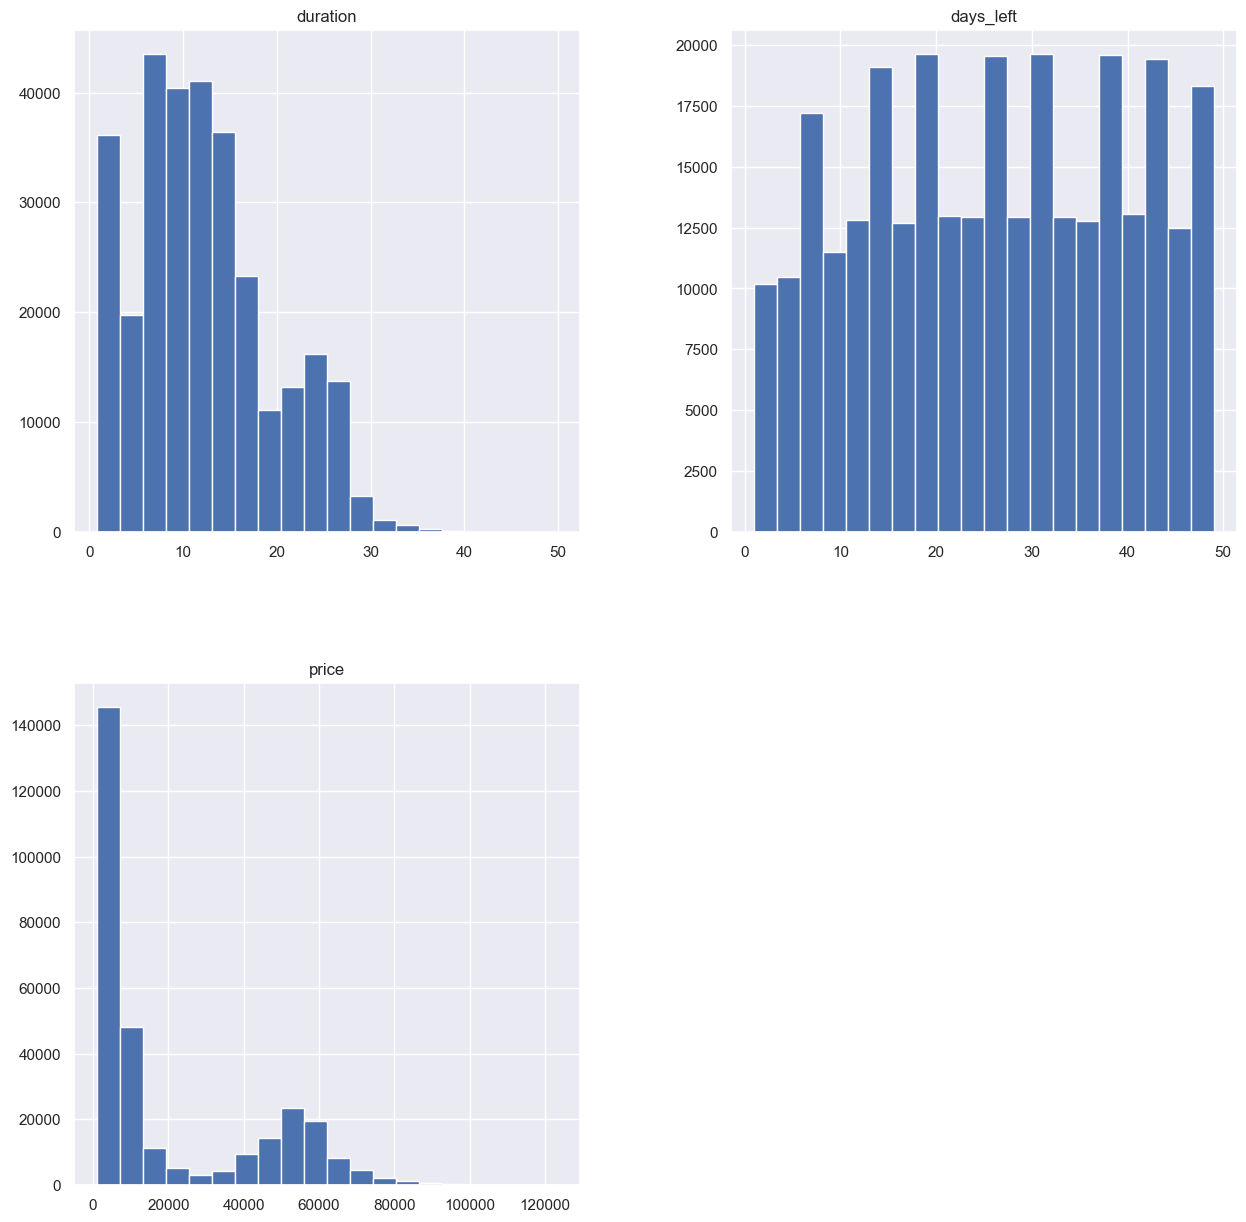

In [76]:
df.hist(bins=20, figsize=(15,15))
plt.show()

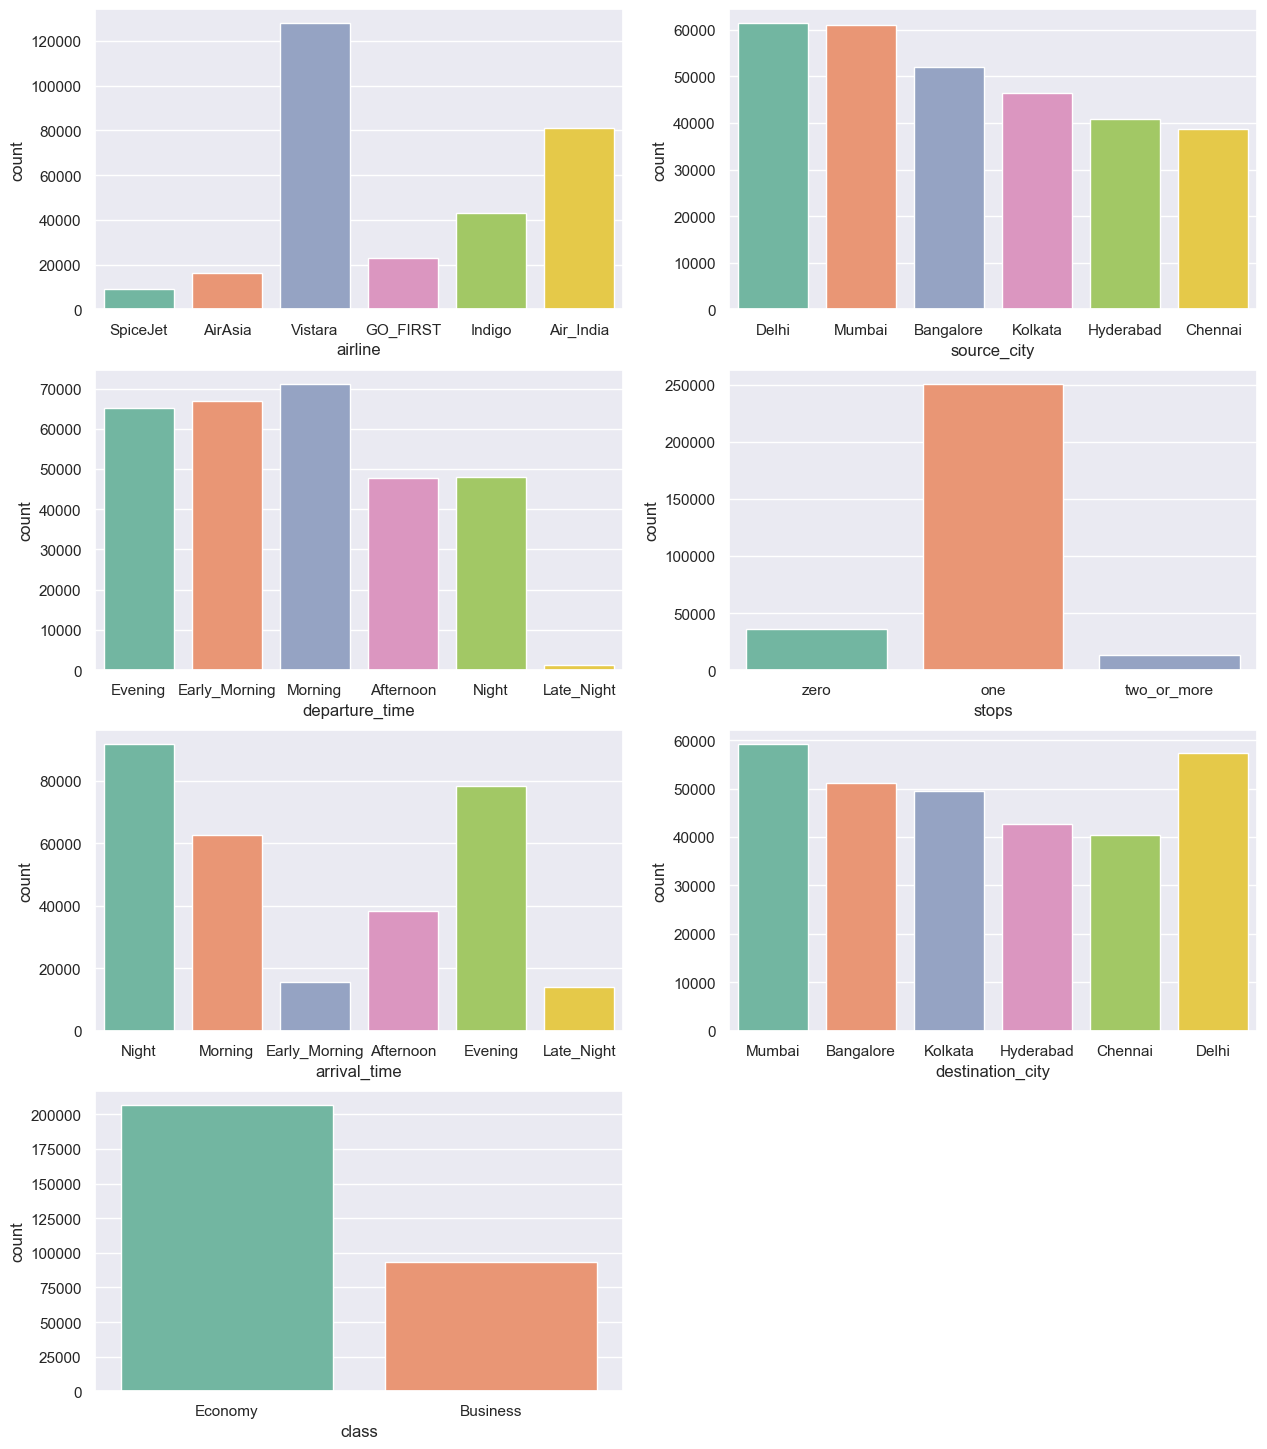

In [77]:
titles = df[['airline','source_city','departure_time','stops','arrival_time','destination_city','class']].columns
grid = gridspec.GridSpec(7,2)
plt.figure(figsize=(15,8*4))
for index, cols in enumerate(df[titles]):
    ax = plt.subplot(grid[index])
    sns.countplot(data = df, x=cols, palette = 'Set2')
plt.show()

Inferences

Airlines:  From the countplot it is clear that the Vistara airlines has the highest booking options, followed by Air India, Indigo, Go first, AirAsia and Spicejet.

Source city: there are more flight booking options from Delhi and Mumbai, while the least is Chennai. Also there are more options with Delhi and Mumbai as the destination city than the others.

Morning flights are more in count than others. it is then followed by early morning, evening, afternoon, and night. late night flight options are less in number.

Most of the flight booking options provide one stop between the source and destination city.

on the basis of class, there are more options with economy class than business one.

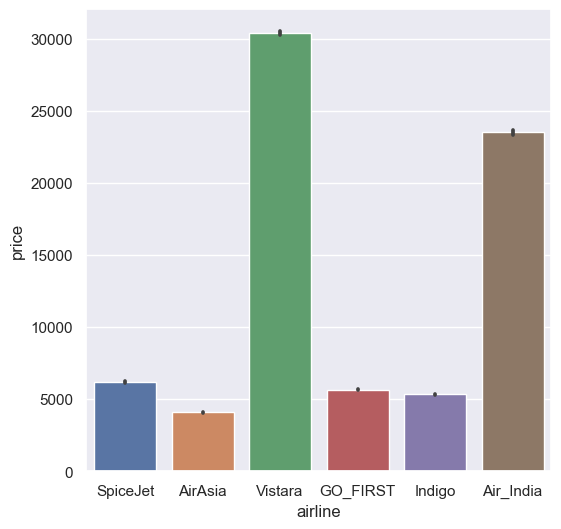

In [78]:
plt.figure(figsize=(6,6))
avgprice = df.groupby('airline')['price'].mean()
sns.barplot(data = df, x='airline', y = df['price'])
plt.show()

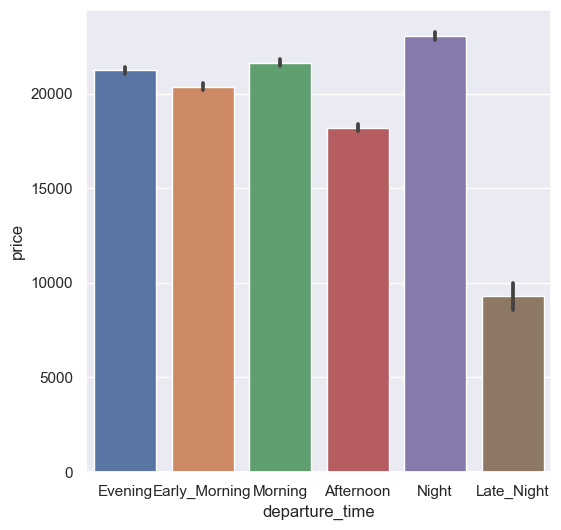

In [79]:
plt.figure(figsize=(6,6))
avgprice = df.groupby('departure_time')['price'].mean()
sns.barplot(data = df, x='departure_time', y = df['price'])
plt.show()

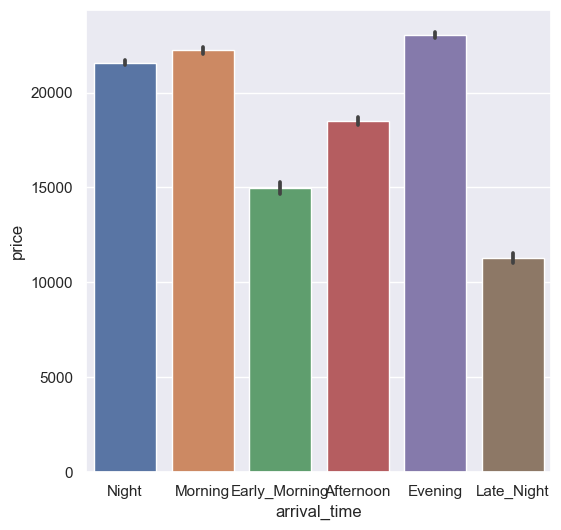

In [80]:
plt.figure(figsize=(6,6))
avgprice = df.groupby('arrival_time')['price'].mean()
sns.barplot(data = df, x='arrival_time', y = df['price'])
plt.show()

Prices of flights whose departure time is at night is higher than any other time flights. flights that depart in the evening, early morning and morning has almost same price. This is followed by the afternoon flights. and the least price is for late night flights.

Prices of flights whose arrival time is at night is higher than any other time flights. flights that arrive in the evening and morning has almost same price. This is followed by the afternoon and early morning reaching flights. and the least price is for late night arriving flights.

([<matplotlib.patches.Wedge at 0x17bd8e97130>,
 [Text(-0.614099407045317, 0.9126236454676102, 'Economy'),
  Text(0.6140994070453172, -0.91262364546761, 'Business')])

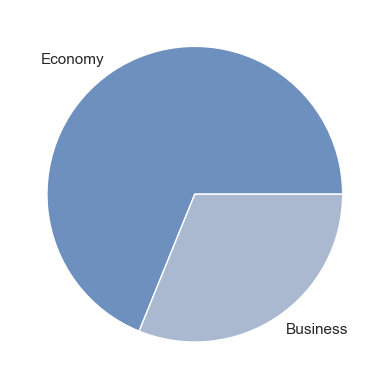

In [81]:
cls_count = df['class'].value_counts()
palette_color = sns.color_palette('vlag')
plt.pie(cls_count,labels = ['Economy','Business'], colors = palette_color)

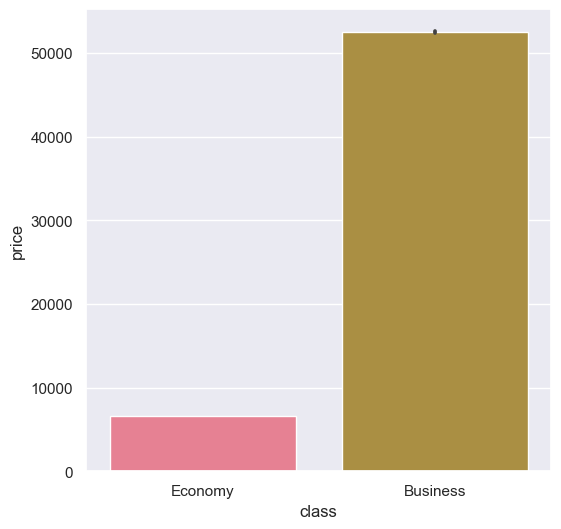

In [82]:
plt.figure(figsize=(6,6))
palette_color = sns.color_palette('husl')
avgprice = df.groupby('class')['price'].mean()
sns.barplot(data = df, x='class', y = df['price'],palette = palette_color)
plt.show()

The business class tickets are approximately 5 times more expensive than the economy class tickets.

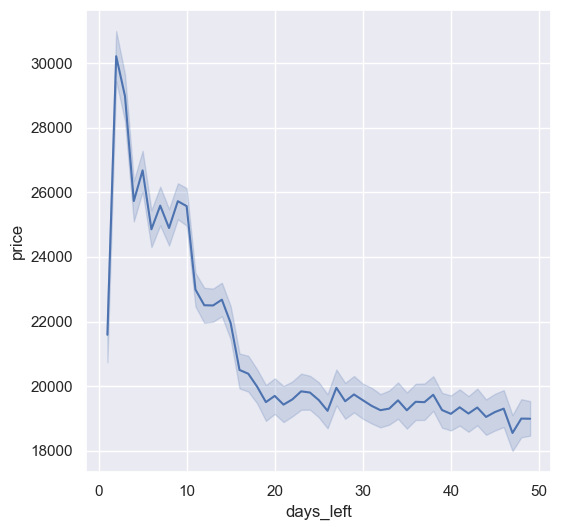

In [83]:
plt.figure(figsize=(6,6))
sns.lineplot(x = df['days_left'],y = df['price'])
plt.show()

From the above graph it is observed that flights ticket price are more if purchase it at the last moment.Early booking will cost less than late ones. As the days left for the flight after booking is less, prices are more. As the days left increases, prices are decreasing.

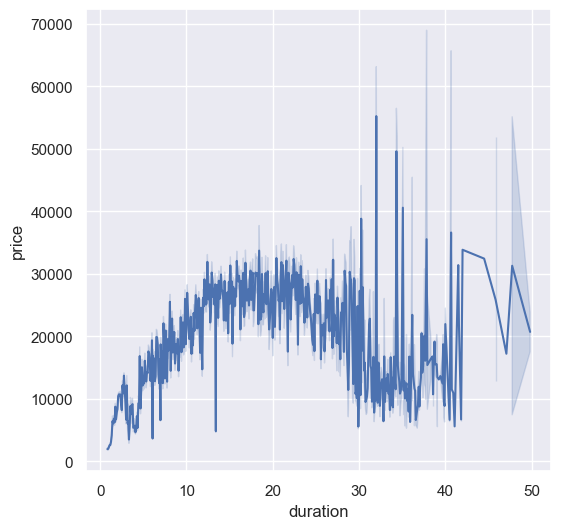

In [84]:
plt.figure(figsize=(6,6))
sns.lineplot(x = df['duration'],y = df['price'])
plt.show()

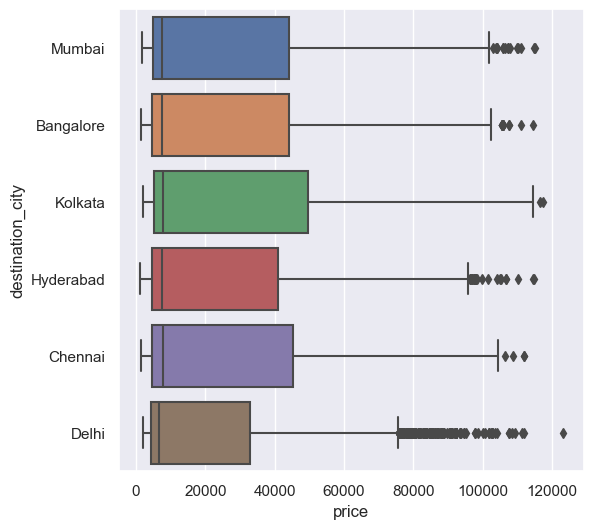

In [85]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df, x="price", y="destination_city")
plt.show()

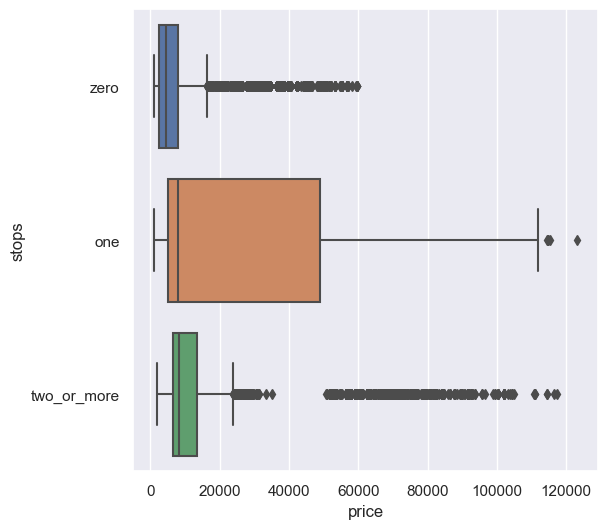

In [86]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df, x="price", y="stops")
plt.show()

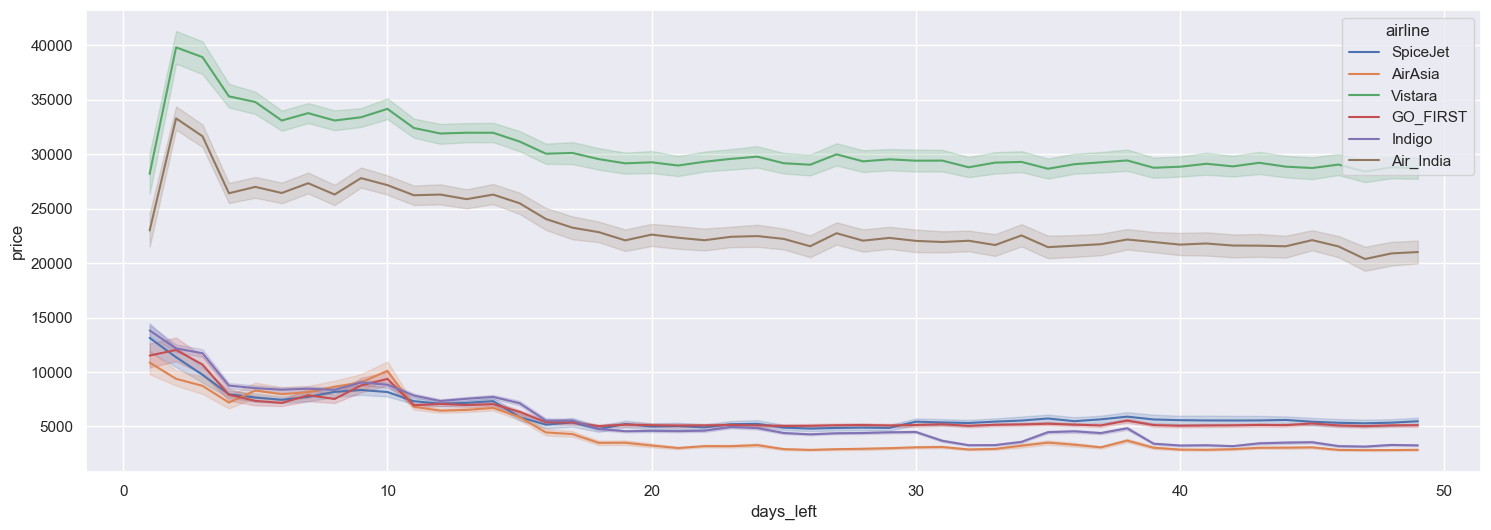

In [87]:
plt.figure(figsize=(18,6))
sns.lineplot(data = df,x = df['days_left'],y = df['price'],hue='airline')
plt.show()

It is seen that Vistara and Air India has the highest prices. Also they are the highest at less number of days left.

In [88]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['airline'] = lb.fit_transform(df['airline'])
df['source_city'] = lb.fit_transform(df['source_city'])
df['departure_time'] = lb.fit_transform(df['departure_time'])
df['stops'] = lb.fit_transform(df['stops'])
df['arrival_time'] = lb.fit_transform(df['arrival_time'])
df['destination_city'] = lb.fit_transform(df['destination_city'])
df['class'] = lb.fit_transform(df['class'])
df['flight'] = lb.fit_transform(df['flight'])
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,5,1477,1,4,0,2,3,0,10.08,49,69265
300149,5,1481,1,0,0,5,3,0,10.42,49,77105
300150,5,1486,1,1,0,5,3,0,13.83,49,79099
300151,5,1483,1,1,0,2,3,0,10.00,49,81585


In [89]:
inputs = df.drop(['price'],axis=1)
inputs

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,4,1408,2,2,2,5,5,1,2.17,1
1,4,1387,2,1,2,4,5,1,2.33,1
2,0,1213,2,1,2,1,5,1,2.17,1
3,5,1559,2,4,2,0,5,1,2.25,1
4,5,1549,2,4,2,4,5,1,2.33,1
...,...,...,...,...,...,...,...,...,...,...
300148,5,1477,1,4,0,2,3,0,10.08,49
300149,5,1481,1,0,0,5,3,0,10.42,49
300150,5,1486,1,1,0,5,3,0,13.83,49
300151,5,1483,1,1,0,2,3,0,10.00,49


In [90]:
target = df['price']
target

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int64

In [91]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.2, random_state = 0)

# Linear Regression Model

In [92]:
from sklearn.linear_model import LinearRegression
modellr = LinearRegression()
modellr.fit(x_train,y_train)
y_pred = modellr.predict(x_test)

In [93]:
from sklearn import metrics
print("Mean Absolute Error, MAE", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error, MSE", metrics.mean_squared_error(y_test,y_pred))
print("root mean squared error: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2 Score: ", metrics.r2_score(y_test,y_pred))

Mean Absolute Error, MAE 4612.0327274792435
Mean Squared Error, MSE 48451921.01767456
root mean squared error:  6960.7414129297
R2 Score:  0.9052412044840216


# KNN

In [94]:
from sklearn.neighbors import KNeighborsRegressor
modelknn = KNeighborsRegressor(n_neighbors=3)
modelknn.fit(x_train,y_train)
y_predknn = modelknn.predict(x_test)

In [95]:
from sklearn import metrics
print("Mean Absolute Error, MAE", metrics.mean_absolute_error(y_test,y_predknn))
print("Mean Squared Error, MSE", metrics.mean_squared_error(y_test,y_predknn))
print("root mean squared error: ", np.sqrt(metrics.mean_squared_error(y_test,y_predknn)))
print("R2 Score: ", metrics.r2_score(y_test,y_predknn))

Mean Absolute Error, MAE 10798.50072462561
Mean Squared Error, MSE 249226214.70753634
root mean squared error:  15786.900098104641
R2 Score:  0.5125812264888764


# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=21, random_state=42, n_estimators=300)
regr.fit(x_train, y_train)
y_predrf = regr.predict(x_test)

In [102]:
from sklearn import metrics
print("Mean Absolute Error, MAE", metrics.mean_absolute_error(y_test,y_predrf))
print("Mean Squared Error, MSE", metrics.mean_squared_error(y_test,y_predrf))
print("root mean squared error: ", np.sqrt(metrics.mean_squared_error(y_test,y_predrf)))
print("R2 Score: ", metrics.r2_score(y_test,y_predrf))

Mean Absolute Error, MAE 906.0149749995816
Mean Squared Error, MSE 5074462.964828702
root mean squared error:  2252.656867973616
R2 Score:  0.9900757289218275
